# Bevezetés a `matplotlib` könyvtárba

A `matplotlib` egy 2D és 3D függvények megjelenítéséhez, vizualizációjához használható könyvtár. Nevét onnan kapta, hogy a függvényeinek interfészei a matlabhoz hasonlóak. 

A könyvtár együttműködik `numpy`val. A továbbiakban a `plt` *aliasszal* fogunk rá hivatkozni a kódokban:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Adatpontok megjelenítése

Olvassuk be a minta adata fájlt:

In [2]:
data = np.loadtxt('./data/path.txt')

```{admonition} Figyelem
:class: warning
Az adat fájlok elérhetőek a tantárgy honlapján!
```

Tekintsük meg a fájl első 5 sorát:

In [3]:
print(data[:5])

[[645779.76 272117.78]
 [645864.1  272075.3 ]
 [645910.56 272052.37]
 [645942.09 272030.22]
 [645982.8  271968.36]]


A fájl két oszlopból áll, melyek 2D pontok koordinátái. Ezek egy jármű útvonalának UTM koordinátái. Rajzoljuk ki az adatpontokat. Ehhez a Matlabhoz hasonlóan a `plot` függvényt használhatjuk, melynek a két bemeneti paramétere a koordináták. Ezután megjelenek az ábra.

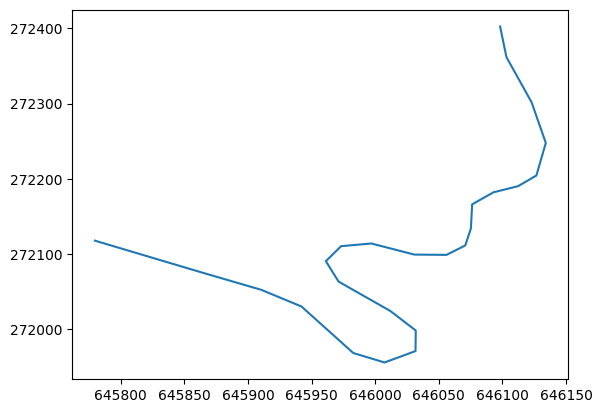

In [4]:
from matplotlib import pyplot as plt
x = data[:, 0]
y = data[:, 1]

plt.plot(x, y)

 ```{admonition} Tipp
:class: hint
Vegyük észre, hogy a `matplotlib` hasonló függvény paraméterekkel működik mint a Matlab, illetve hasonló logikán alapul maga a könyvtár is; innen a neve is. Így a Matlabban tanultakat használhatjuk itt is.
```

Vegyük észre, hogy az X és Y tengely arányai nem azonosak. Ezt a következő módon tudjuk javítani:

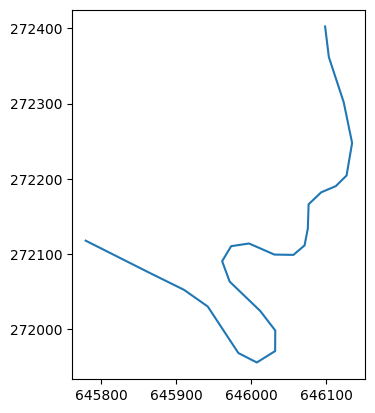

In [5]:
x = data[:, 0]
y = data[:, 1]
plt.plot(x, y)
plt.gca().set_aspect('equal')

A fenti kód utolsó sora állítja be a helyes tengely arányokat (*aspect ratio*). A sor két függvényhívásból áll:
1. először lekérjük a tengelyekhez tartozó grafikus objektumot a `gca()` függvénnyel
2. ezután a `set_aspect` segítségével beállítható a tengelyek aránya. A `set_aspect` függvénynek további [beállításai lehetnek](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html)

Alapértelmezetten a könyvtár összeköti az egyes adatpontokat. Amennyiben a pontokat mint pontok szeretnék a grafikán ábrázolni, formázzuk a grafikont a `plot` függvény harmadik paramétere segítségével:

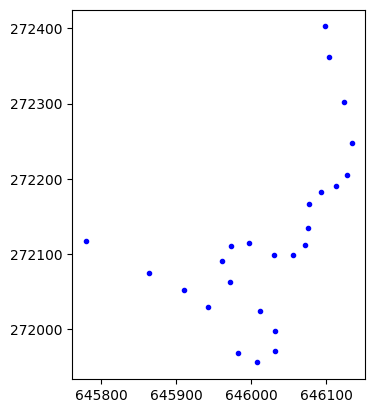

In [6]:
from matplotlib import pyplot as plt
plt.plot(x, y, 'b.')
plt.gca().set_aspect('equal', 'box')

Az ábra méretét is megváltoztathatjuk a `figure` `figsize` paraméterének beállításával:

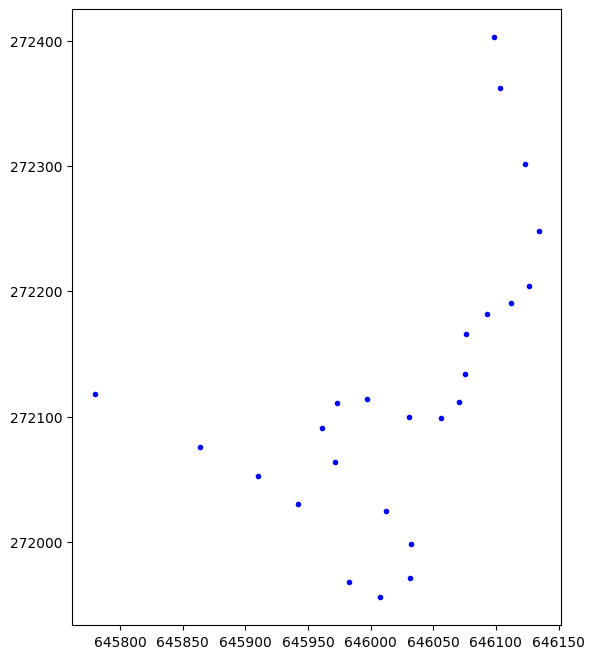

In [7]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.')
plt.gca().set_aspect('equal', 'box')

További formázási lehetőség a pontokat összekötni:

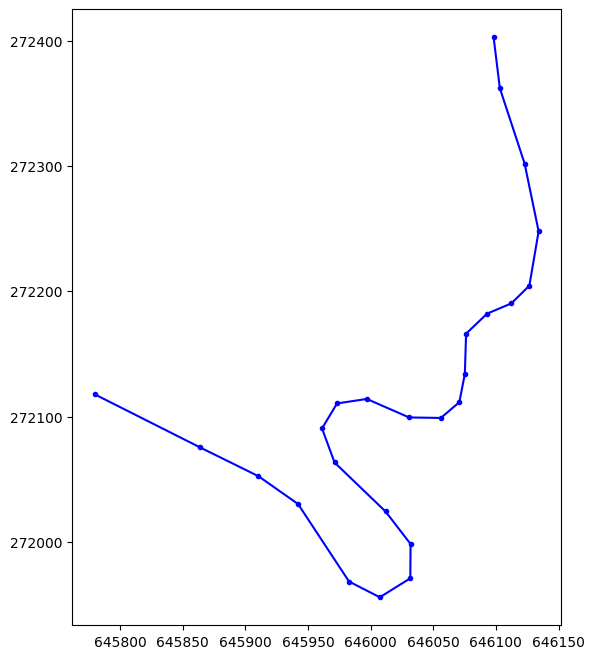

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'b.-')
plt.gca().set_aspect('equal', 'box')

A formázás `b.-` három részből áll: 
- `b` a színt jelöli,
- `.` a pont stílusát jelöli, amit *marker*nek hívunk, és a
- `-` a vonal típusát jelöli.    

További formázási lehetőségeket a `help(plt.plot)` parancs segítségével vagy a [matplotlib honlapján](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html) találhatunk.

```{admonition} Feladat
:class: Important
A fenti ábrát jelenítsük meg szagatott vonallal és piros színnel. A pontokon jelenítsünk meg háromszöget.
```

Lehetőségünk van címet adni az ábrának a `title` függvény segtségével, mely az ábra fölé kerül alapértelmezésben. Ezen kívűl adhatunk jelmagyaráztatot is az ábrához. Ehhez adjuk meg `label` opcionális parametért a `plot` függvényhez, és hívjuk meg a `legend` függvényt az ábra kódja után.  

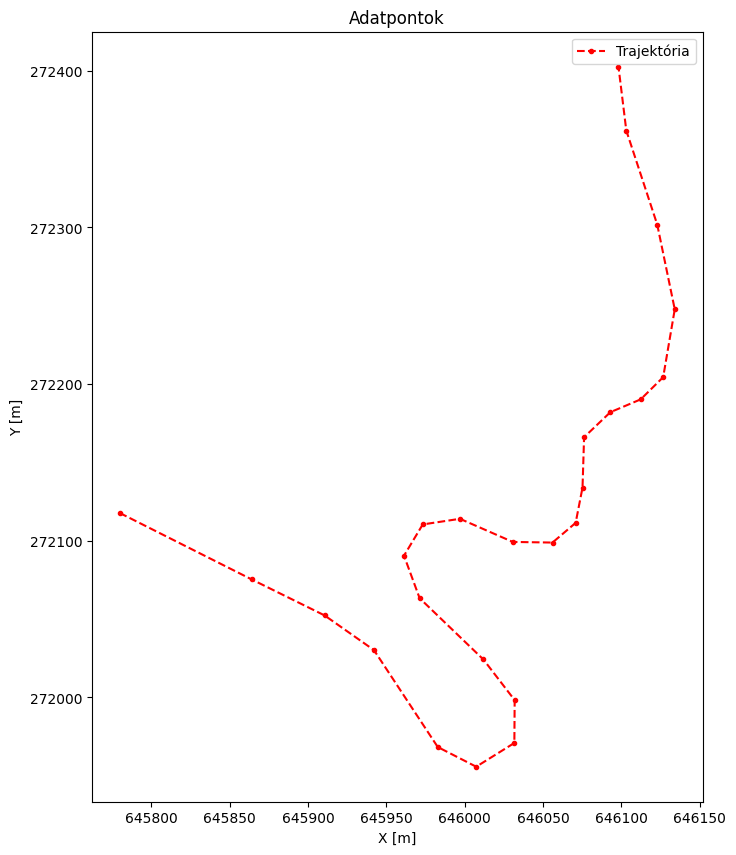

In [9]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 10))
plt.plot(x, y, 'r.--', label="Trajektória")
plt.gca().set_aspect('equal', 'box')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Adatpontok')
plt.legend()

## Függvények ábrázolása

Egy az analízis tárgyban tanult és hasznos csoportosítása a függvényeknek:

- **Skalár-skalár függvények vagy egyváltozós valós függvények**: Ezek a függvények az általonos iskolában tanult függvények, melyeknek bemenete egy szám, kimenete egy szám, vagy precízen fogalmazva a függvény értelmezési tartománya a valós számtest, és érték készlete is a valós számtest. A függvények definíció szerinti tulajdonsága, hogy egy bemeneti értékhez csak egy kimeneti érték tartozhat, de egy kimeneti értékhez több bemeneti érték is, vagy precízen, egy értelmezési tartománybeli elemet a függvény pontosan egy darab értékészlet beli elemre képez le. Ezt a matematikábn szürjektív leképezének hívják. Így például a kör nem adható meg skalár-skalár függvény formában, hiszen, például az origó középpoontú egység sugarú kör az `X=0` pontban az `Y=1` és `Y=-1` pontokat venné fel, mely sérti a szürjektivítást. 
- **Skalár-vektor függvények vagy görbék**: Ezek a függvények adnak meg tetszőleges görbét a síkon, vagy magasabb dimenziós térben. Bemenete egy szám, kimenete egy adott dimenziós vektor, vagy precízen fogalmazva a függvény értelmezési tartománya a valós számtest, és érték készlete a adott dimenziójú valós vektor tér. A bemeneti változót hívjuk a görbe paraméterének. Példaként említhetjük a kört, spirált, vagy akár az egyenes is megadható ebben a formában. 
- **Vector-skalár függvények vagy felületek**: Ezek a függvényekkel adhatunk meg  felületeket, például sík, ellipszoid, geoid, domborzat. A bemenete egy vektor a kimenete pedig egy szám, vagy precízen fogalmazva a függvény értelmezési tartománya egy adott dimenziójú valós vektor tér, és érték készlete a valós számtest.
- **Vektor-vektor függvények vagy vektor mezők**: Ezen függvények bemenete egy adott dimenziójú vektor, és kimenete ugyancsak egy vektor, melynek dimenziója eltérhet a bemeneti vektor dimenziójától. Precízen fogalmazva a függvény értelmezési tartománya és érték készlete a valós vektor téren van definiálva. A bemeneti változót hívjuk a görbe paraméterének. Vektormezőre példa a gravitációs erőtér, mely megadja a Föld egy adott pontján (bemeneti vektor) a gravitáció irányát és nagyságát (kimeneti vektor).

A függvények másik osztályozása a következő mely mérnöki gyakorlatban, vagy számítógépes gyakorlatban hasznos:
- **explicit függvény**,
- **implicit függvény**,
- **parametrikus függvény**.

Egy geometriai alakzat általában több különböző egyenlettel is megadható, melyek különböző függvény csoportokhoz tartozhatnak. Így például, a gömb egyenlete megadható implicit formában, ekkor ez az egyenlet skalár-vektor függvény, vagy megadható parametrikus formában, mely függvény vektor-vektor függvény csoportba tartozik.

### Skalár-skalár vagy egyváltozós függvények ábrázolása

Ábrázoljunk egy másodfokú görbét ($x^2$) grafikonon. A függvény ábrázolásához generálnunk kell $(x, y)$ koordináta párokat. Ehhez szükségünk van a független változó egy sorára. A numpy könyvtár `linspace` függvényét használjuk:

In [22]:
x = np.linspace(-10, 10, 100)
y = x**2

print(x[:10])
print(y[:10])

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818]
[100.          96.00040812  92.08244057  88.24609734  84.49137843
  80.81828385  77.22681359  73.71696766  70.28874605  66.94214876]


Ezután jelenítsük meg a generált pontpárokat:

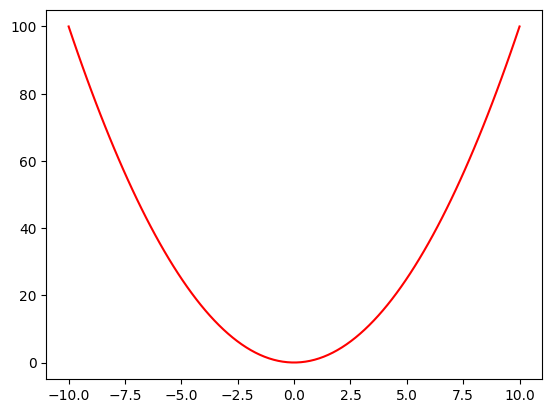

In [23]:
plt.plot(x, y, 'r-')

A függvényt definálhatjuk `lambda` segítségével is:

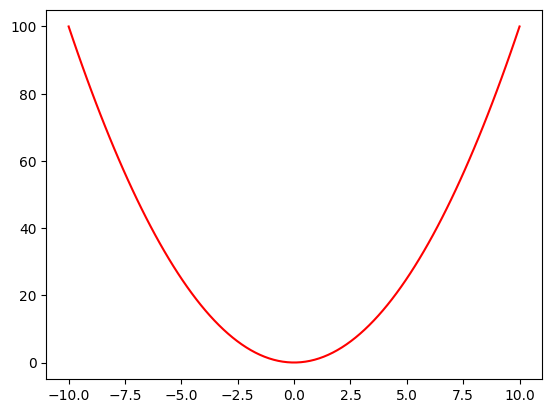

In [25]:
f = lambda x: pow(x, 2)
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x), 'r-')

A `linspace`ben használt felosztás befolyásolja a függvény vizualizációjának a "felbontását". Nézzük meg a következő példát, ahol 20, 10, 7 és 5 felosztás mellett jelenítjük meg a másodfokú görébt különböző. A különböző felosztások különböző színnel kerülnek megjelenítésre.

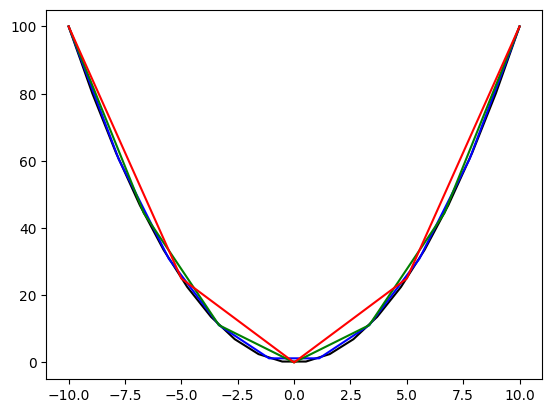

In [13]:
x = np.linspace(-10, 10, 20)
ax = plt.plot(x, f(x), 'k-')
x = np.linspace(-10, 10, 10)
ax = plt.plot(x, f(x), 'b-')
x = np.linspace(-10, 10, 7)
ax = plt.plot(x, f(x), 'g-')
x = np.linspace(-10, 10, 5)
ax = plt.plot(x, f(x), 'r-')

Látható a különbség a függvénye alakjában különböző felbontások mellett. 

Hogy mennyire fontos a megfelelő felosztás megválasztása, azt az alábbi példa szemlélteti. Itt először a $sin(10x)$ görbét rajzoljuk ki 10-es felosztással a $[-\pi, \pi]$ intervallumon.

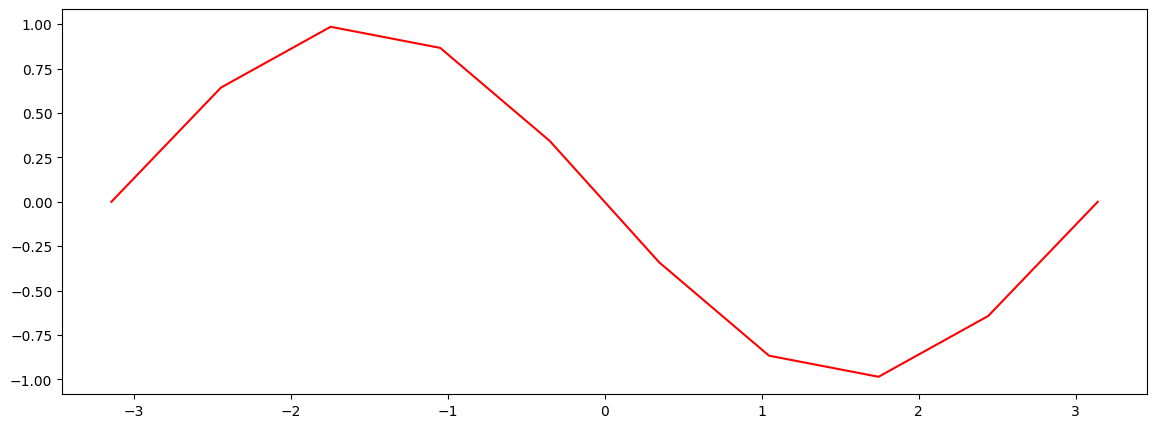

In [14]:
f = lambda x: np.sin(10*x)
x = np.linspace(-np.pi, np.pi, 10)

plt.figure(figsize=(14,5))
ax = plt.plot(x, f(x), 'r-')

Ez alapján, azt gondolhatjuk, hogy a függvény alakja egy egyszerű szinus függvény. Most nézzük meg, mit kapunk 20 és 1000-es felbontás mellett

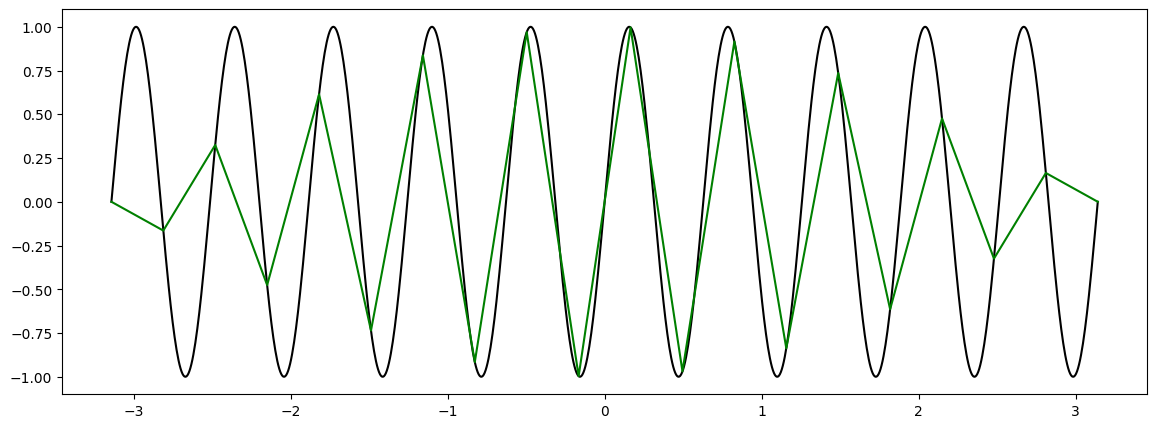

In [15]:
f = lambda x: np.sin(10*x)

plt.figure(figsize=(14,5))

x = np.linspace(-np.pi, np.pi, 1000)
ax = plt.plot(x, f(x), 'k-')
x = np.linspace(-np.pi, np.pi, 20)
ax = plt.plot(x, f(x), 'g-')

20-as felbontás esetén már láthatóak a csucsok, azonban a grafikon végein "lecsengés" látszik ami nem igaz. 1000-es felbontás mellett kapjuk meg a függvény igazi alakját. Emiatt legtöbb esetben célszerű nem felosztást, hanem lépésközt megadni, amihez az `arange` függvényt használhatjuk. Ebben az esetben is azonban óvatosnak kell lennünk bonyolultabb függvények esetén. Az alábbi példában 0.01-t használjuk lépésköznek:

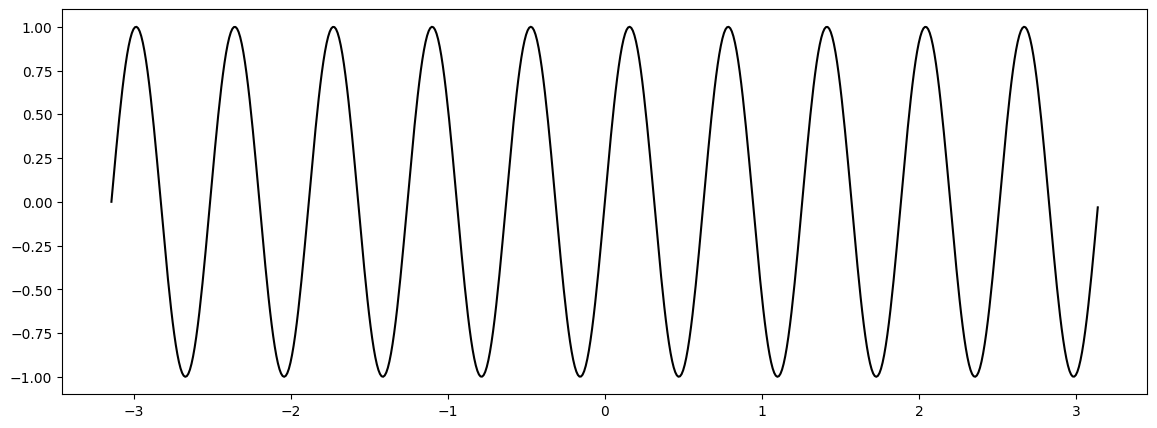

In [16]:
x = np.arange(-np.pi, np.pi, 0.01)

plt.figure(figsize=(14,5))
ax = plt.plot(x, f(x), 'k-')

### Vektor-skalár függvények a síkon

Ábrázoljuk a következő parametrikus (vektor-skalár) függvényt:

$x = 2cos(t)$

$y = 2sin(t)$

Ehhez a két koordináta függvényt definiáljuk, mint skalár-skalár függvényt:

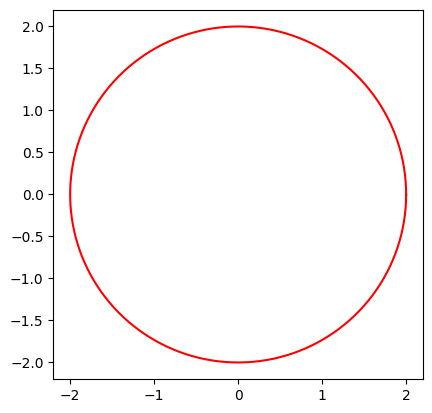

In [27]:
t = np.arange(0, 2*np.pi, 0.01)
x = 2*np.cos(t)
y = 2*np.sin(t)

plt.plot(x, y, 'r-')
plt.gca().set_aspect('equal', 'box')

### Parametrikus görbe a térben

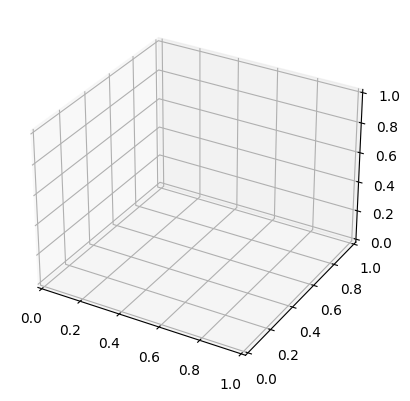

In [28]:
ax = plt.figure().add_subplot(projection='3d')

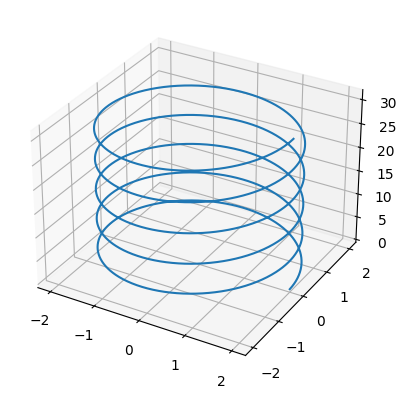

In [19]:
t = np.arange(0, 10*np.pi, 0.01)
x = 2*np.cos(t)
y = 2*np.sin(t)
z = t

ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z)

```{admonition} Kiegészítő anyag
:class: note
Python vizualizációhoz további hasznos linkek:
- [Matplotlib példák](https://matplotlib.org/stable/gallery/index.html)
- [Szép 2D grafikák készítéséhez példák kóddal](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)
- [Seaborn könyvtár még szebb ábrákhoz és adat vizualizációhoz](https://seaborn.pydata.org/)
```